# Importing Necessary Libraries

In [16]:
# Dataframes
import numpy as np
import pandas as pd
from copy import deepcopy

# Plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('ggplot')

# Scikit Learn
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Initializing Parameters

In [17]:
# Path of the folder
path = 'C:/Users/prash/Downloads/ML ALGORITHMS/'

# Number of clusters required
k = 3

# Importing and Cleaning Dataset

In [18]:
# Import Iris Dataset
iris_dataset = pd.read_csv(path + 'DATASETS/' + 'Iris.csv')
# Removing Index Column
iris_dataset = iris_dataset.iloc[:,1:]

# Input Dataframe
X = iris_dataset.iloc[:,:-1]
X = np.array(X)

# Normalize the Dataframe
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Implementation from Scratch

Initial Centroids are: 

 [[0.31294682 0.16902481 0.77622716 0.54129995]
 [0.29152361 0.00738321 0.81514171 0.54732211]
 [0.54936823 0.5961748  0.51865175 0.99871349]]

The Errors obtained after each iteration are:

-> 1.9986884439413626
-> 0.7566534472600941
-> 0.3348146740385607
-> 0.2518273595596274
-> 0.05719612380110593
-> 0.021737794504765824
-> 0.014282959295408607
-> 0.01421674600637716
-> 0.009128643878654061
-> 0.016103411251942125
-> 0.0

The Final Centroids obtained are:

 [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.41203704 0.27690972 0.55896893 0.52083333]
 [0.66773504 0.44310897 0.7571708  0.78205128]]


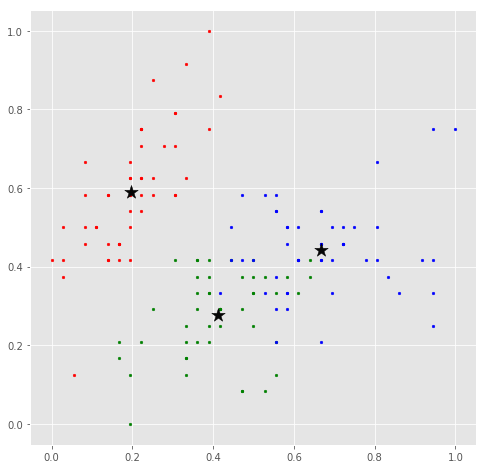

In [19]:
# Euclidean Distance Function
def dist(a, b,ax=1):
    
    # Euclidian Distance
    distance = np.sqrt(np.sum((a - b)**2,axis=ax))
    
    return distance


# Initialize Centroids randomly in C (will contain updated Centroids value)
C = np.random.uniform(0, np.max(X), size=(k,X.shape[1]))
print("Initial Centroids are: \n\n",C)

# Store old Centroid values in C_old
C_old = np.zeros(C.shape)

# Initialize target clusters for each instance as 0
clusters = np.zeros(X.shape[0])

# Error - Distance between new centroids and old centroids
error = dist(C, C_old,None)
print("\nThe Errors obtained after each iteration are:\n")
print("->",error)

# Loop will run till the error becomes zero
while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(X.shape[0]):
        distances = dist(C, X[i],1)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the mean of all the instances in that cluster
    for i in range(k):
        points = [X[j] for j in range(X.shape[0]) if clusters[j] == i]
        if(len(points) > 0):
            C[i] = np.mean(points, axis=0)
    
    # Calculating Error 
    error = dist(C, C_old,None)
    print("->",error)
    
print("\nThe Final Centroids obtained are:\n\n",C)


# Initialize Colors
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Plot each point
for i in range(k):
    points = np.array([X[j] for j in range(X.shape[0]) if clusters[j] == i])
    if(points.size > 0):
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
# Plot the Centroids
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# Scikit Learn Implementation

The Final Centroids obtained are:

 [[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


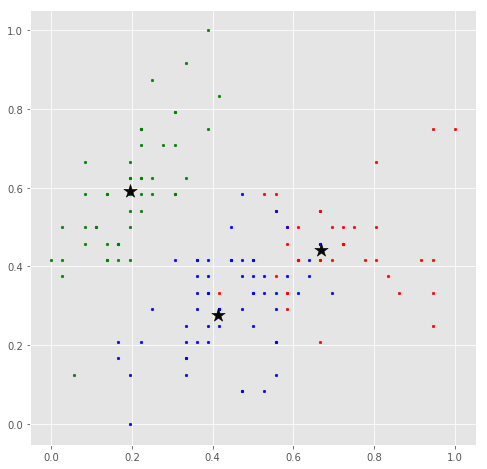

In [20]:
# Number of clusters
kmeans = KMeans(n_clusters = k)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_
print("The Final Centroids obtained are:\n\n",centroids)


# Initialize Colors
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Plot each point
for i in range(k):
    points = np.array([X[j] for j in range(X.shape[0]) if labels[j] == i])
    if(points.size > 0):
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
# Plot the Centroids
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# Metrics to Determine Number of Clusters K

## Elbow Method

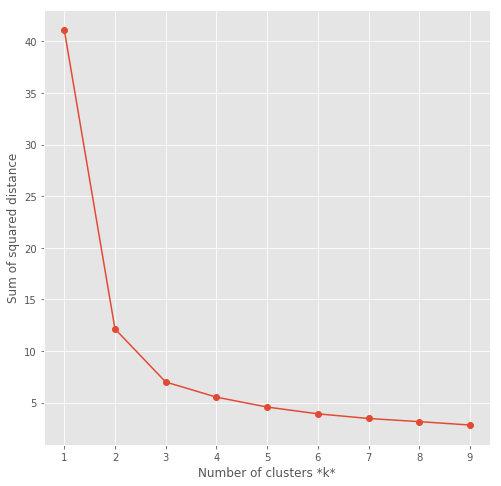

In [21]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure()
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## Silhouette Analysis

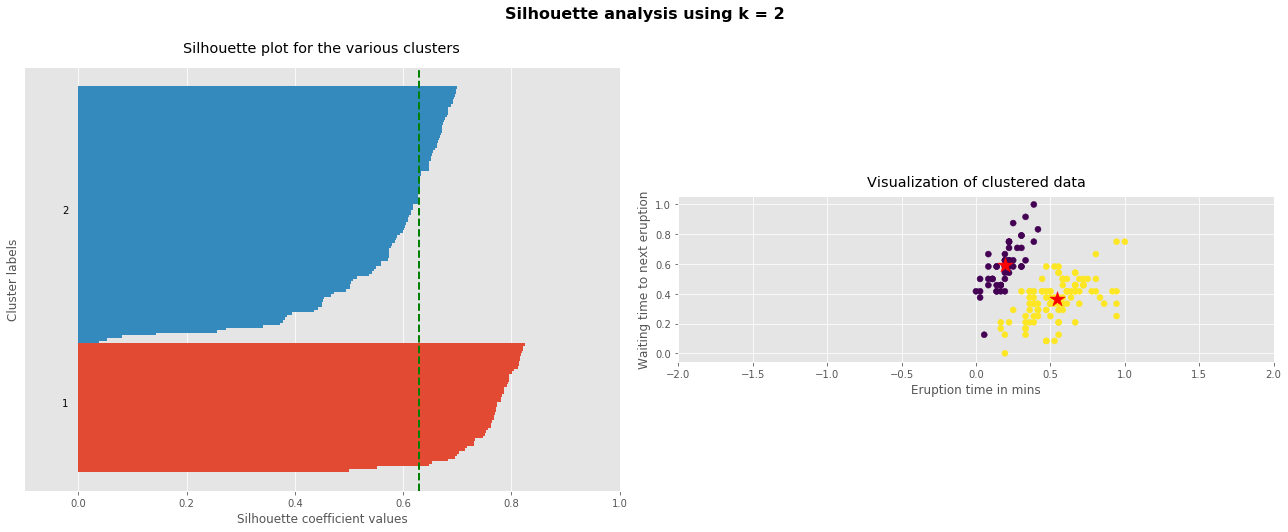

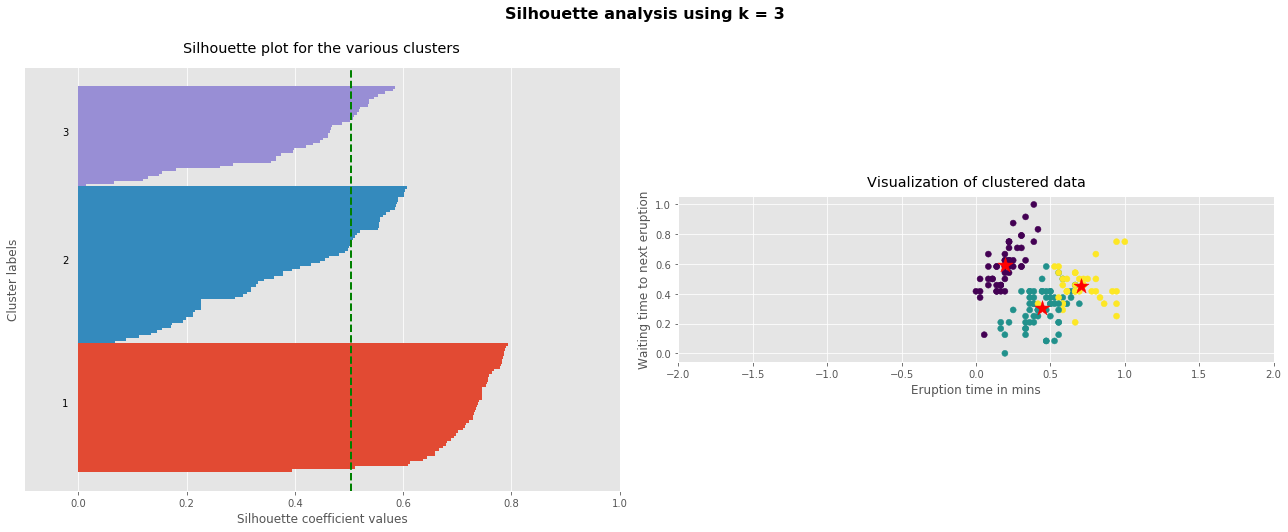

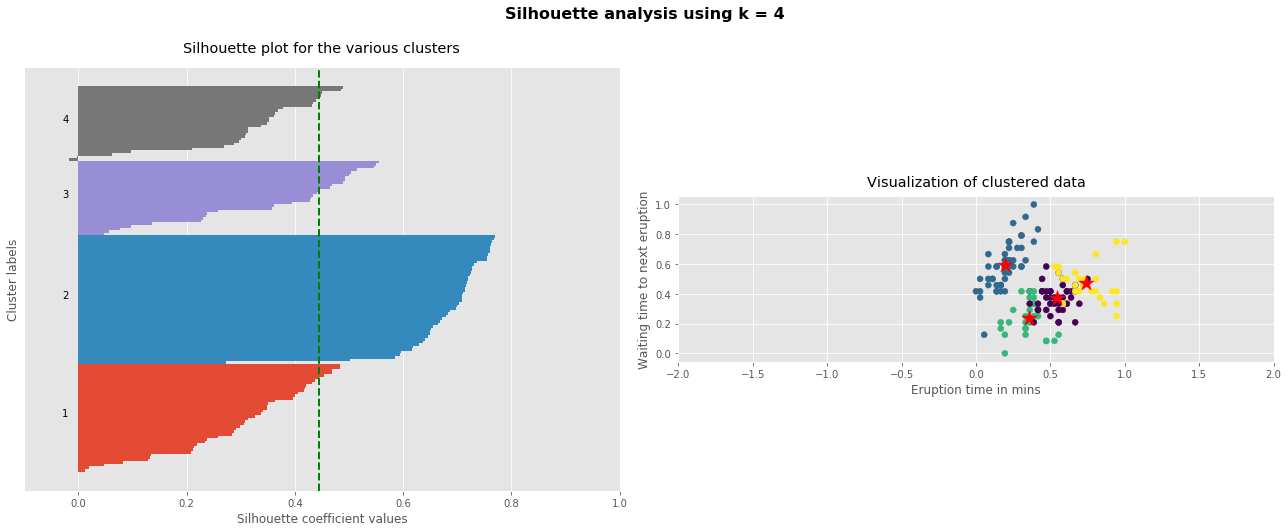

In [22]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

### Reference:
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

Refer the above link especially for more details about Silhouette Analysis